In [ ]:
# Box-plot of games-played from 96-2015
# A player traded to a different team midseason can affect GP.
# Theo ratlif and Shareef Abdur_Rahim logged 85 games in 2003. They were both traded from Philadelphia to Portland 
# midseason. It seems philadelphia played more games at the start of the season up until both players were traded than Portland 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df1 = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_1997-98.csv')
df2 = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_2001-02.csv')

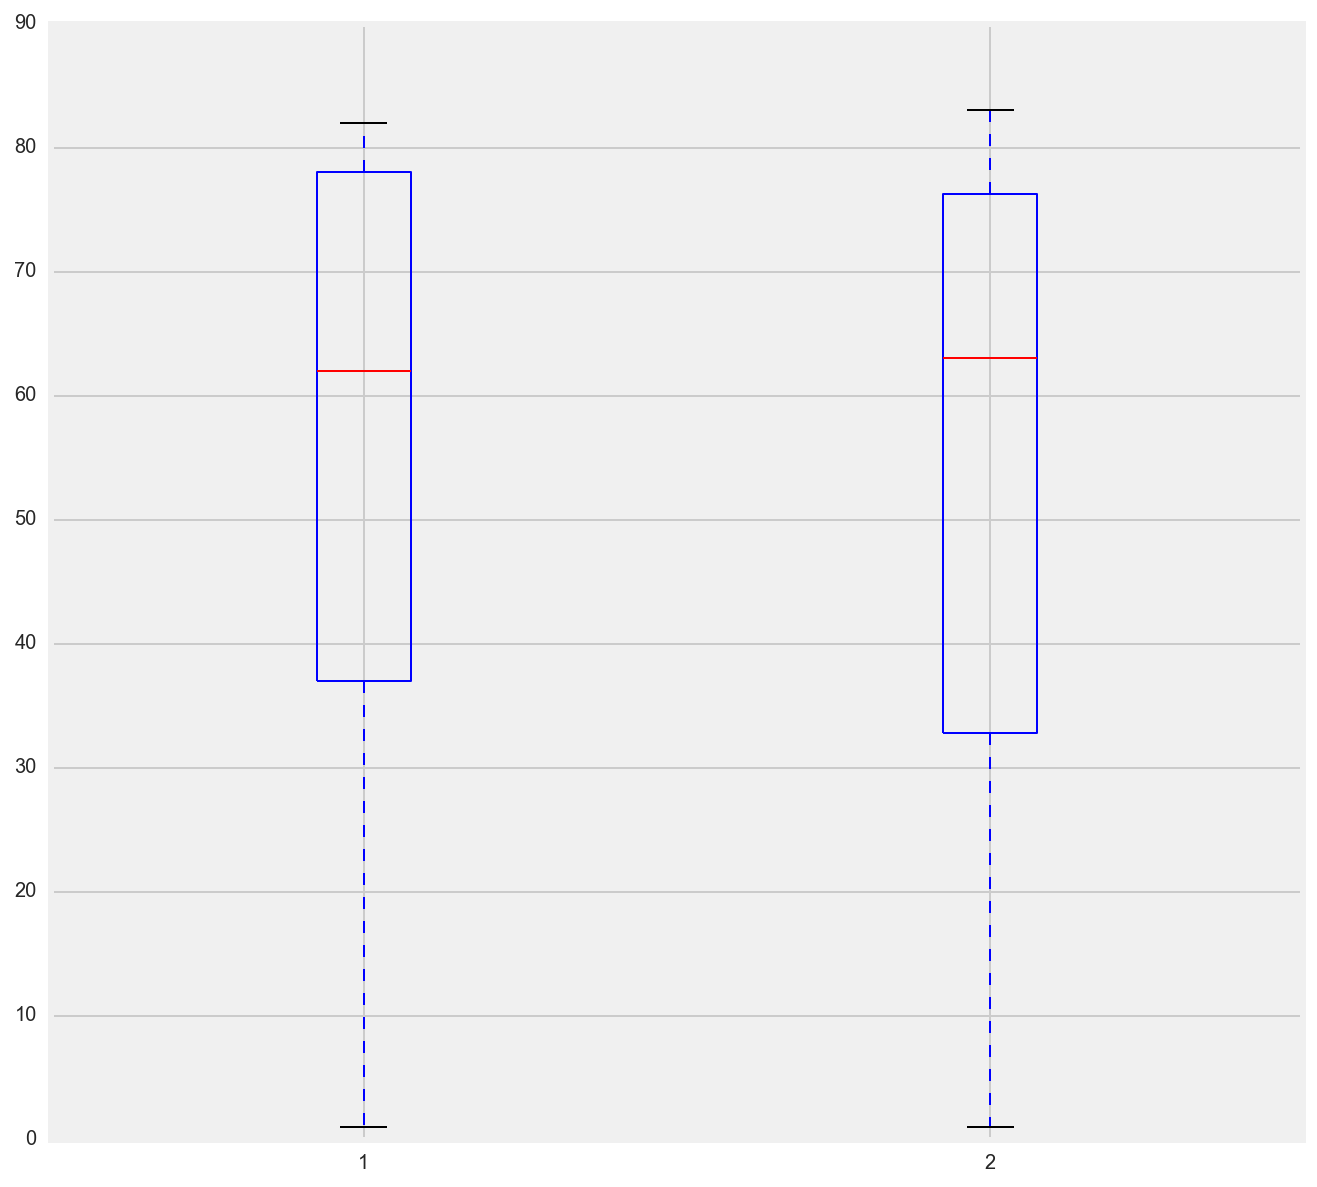

In [4]:
data_to_plot = [df1.GP, df2.GP]
fig, ax = plt.subplots(figsize=(10,10))

ax.boxplot(data_to_plot)
plt.show()

In [5]:
non_lockout_yrs = ['1996-97', '1997-98', '1999-00', '2000-01', '2001-02',
                 '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
                 '2009-10', '2010-11', '2012-13', '2013-14', '2014-15', '2015-16']

In [6]:
f = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_%s.csv'
data = []
avg_gp = {}
for z in non_lockout_yrs:
    df = pd.read_csv(f % z)
    data.append(df['GP'])
    avg_gp[z] = df['GP'].mean()

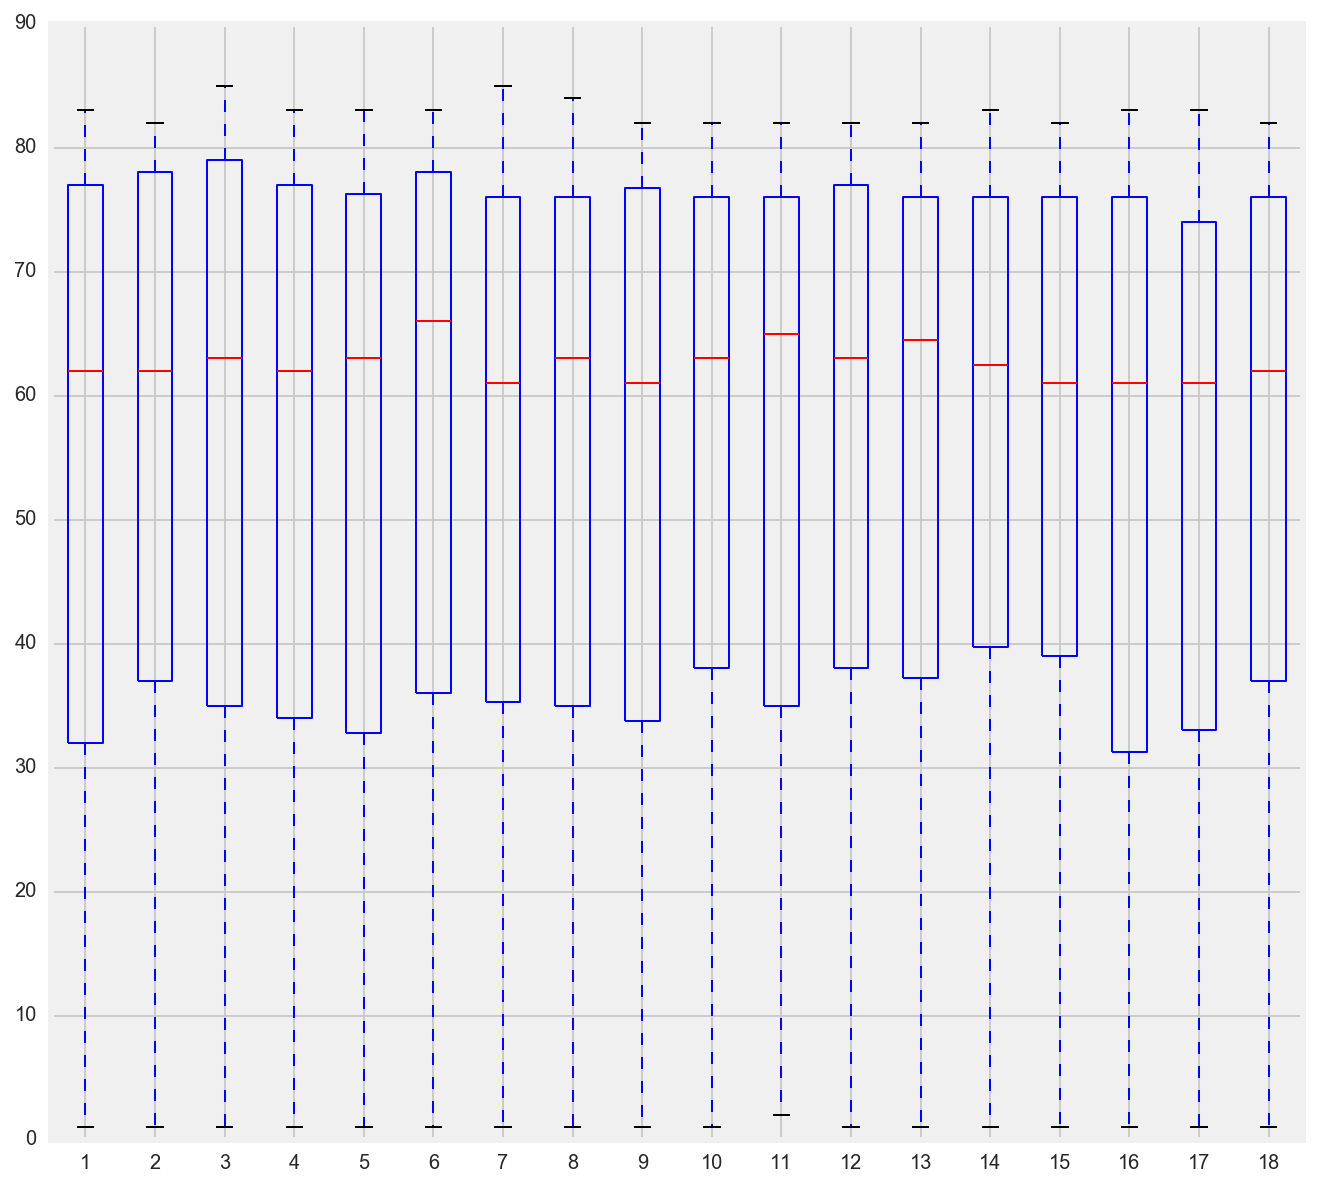

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.boxplot(data)
plt.show()

In [8]:
df_avg = pd.DataFrame(avg_gp, index=[0]).T
df_avg

,0
1996-97,53.870748
1997-98,54.671982
1999-00,55.348519
2000-01,54.356009
2001-02,54.334091
2002-03,55.932243
2003-04,54.056561
2004-05,53.778017
2005-06,54.399563
2006-07,54.772926


# Reason a player has played more than the regular season standard of 82 games

In [34]:
df_2003[df_2003.GP >= 83]

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,CFID,CFPARAMS
378,378,949,Shareef Abdur-Rahim,1610612757,POR,27.0,85,35,50,0.412,...,0.4,1.1,2.6,0.0,16.3,-1.4,28,0,5,"949,1610612757"
396,396,689,Theo Ratliff,1610612757,POR,31.0,85,35,50,0.412,...,3.6,0.4,3.5,0.0,7.9,-0.6,8,0,5,"689,1610612757"


In [52]:
max_data = [d.max() for d in data]

# maximum games played of one player for each non-lockout year
for index, i in enumerate(max_data):
    print "Maximum games played by a player in %s is %d" % (non_lockout_yrs[index], i)

Maximum games played by a player in 1996-97 is 83
Maximum games played by a player in 1997-98 is 82
Maximum games played by a player in 1999-00 is 85
Maximum games played by a player in 2000-01 is 83
Maximum games played by a player in 2001-02 is 83
Maximum games played by a player in 2002-03 is 83
Maximum games played by a player in 2003-04 is 85
Maximum games played by a player in 2004-05 is 84
Maximum games played by a player in 2005-06 is 82
Maximum games played by a player in 2006-07 is 82
Maximum games played by a player in 2007-08 is 82
Maximum games played by a player in 2008-09 is 82
Maximum games played by a player in 2009-10 is 82
Maximum games played by a player in 2010-11 is 83
Maximum games played by a player in 2012-13 is 82
Maximum games played by a player in 2013-14 is 83
Maximum games played by a player in 2014-15 is 83
Maximum games played by a player in 2015-16 is 82


In [35]:
# the explanation for a player to have GP greater than 82 is suppose a player is traded to a different
# in the middle of the season
df_2003 = pd.read_csv('../../copy_capstone/datasets/player_avgs/player_average_2003-04.csv')
game_log_2003 = pd.read_csv('../../copy_capstone/datasets/game_logs_1946-2016/game_logs2003-04.csv')

In [36]:
game_log_2003.head()

,Unnamed: 0,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,0,22003,1503,Tracy McGrady,ORL,Orlando Magic,20300927,2004-03-10,ORL vs. WAS,W,...,7,10,5,1,0,6,1,62,10,0
1,1,22003,1503,Tracy McGrady,ORL,Orlando Magic,20300123,2003-11-14,ORL @ DEN,L,...,4,6,5,2,2,4,2,51,-1,0
2,2,22003,2037,Jamal Crawford,CHI,Chicago Bulls,20301156,2004-04-11,CHI @ TOR,W,...,7,7,2,2,1,3,3,50,12,0
3,3,22003,947,Allen Iverson,PHI,Philadelphia 76ers,20300224,2003-11-29,PHI vs. ATL,W,...,3,5,6,2,0,2,3,50,11,0
4,4,22003,1740,Rashard Lewis,SEA,Seattle SuperSonics,20300025,2003-10-31,SEA @ LAC,W,...,6,8,4,0,1,0,1,50,22,0


In [50]:
theo_data = game_log_2003[game_log_2003.PLAYER_NAME == 'Theo Ratliff']
shareef_data = game_log_2003[game_log_2003.PLAYER_NAME == 'Shareef Abdur-Rahim']

In [49]:
theo_data.TEAM_NAME.unique()
theo_data.groupby(['TEAM_ABBREVIATION']).size()

TEAM_ABBREVIATION
ATL    53
POR    32
dtype: int64

In [51]:
shareef_data.TEAM_NAME.unique()
shareef_data.groupby(['TEAM_ABBREVIATION']).size()

TEAM_ABBREVIATION
ATL    53
POR    32
dtype: int64

# Answer:
- Theo ratlif and Shareef Abdur_Rahim was traded midseason and played 53 games with Atlanta and played 32 with Portland. 
- It seems that ATL has a heavier game schedule towards start of the season while Portland schedule more heavy towards the end

# Average game played per player in each non-lockout year

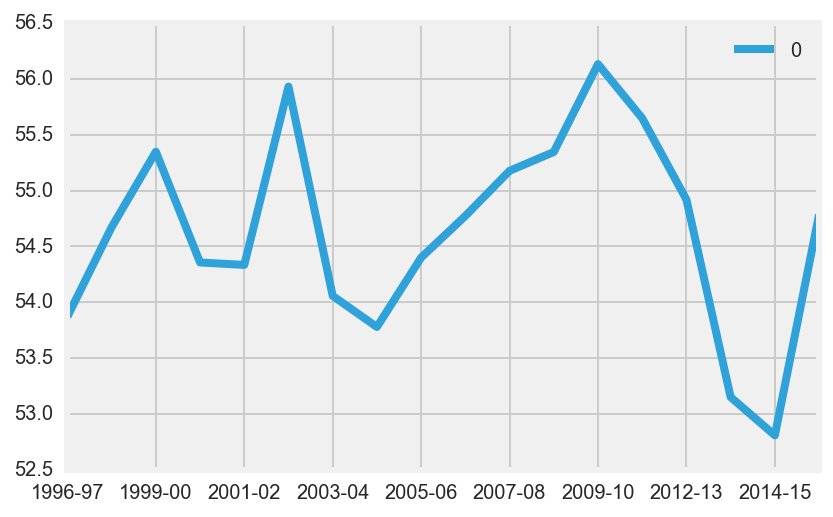

In [25]:
df_avg.plot()